In [1]:
# 1) Data Exploration

import pandas as pd
column_names = ['target','ids','date','flag','user','text']
# Loading the dataset
df = pd.read_csv("training.1600000.processed.noemoticon.csv", names = column_names,encoding='ISO-8859-1')
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [2]:
# Displaying the basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [3]:
# Displaying the first few rows of the dataset
print(df.head())

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [4]:
# 2) Data Cleaning

#  (i) Dropping the irrelevant columns
#  Drop unnecessary columns
# df = df[['target', 'text']]

# (i) Handling the missing values
df.dropna(inplace=True)

# (ii) Dropping the duplicate entries
df.drop_duplicates(inplace=True)

# (iii) Displaying the cleaned dataset
print(df.head())

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


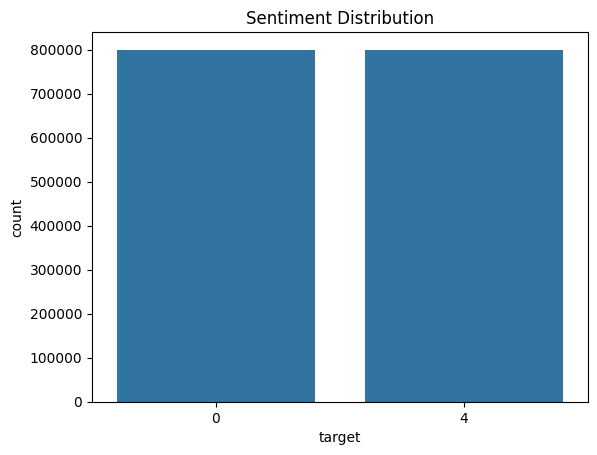

In [6]:
# 3) Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Conducting EDA to gain initial insights
# (e.g., summary statistics, distribution of tweet lengths)

# Visualizing sentiment distribution
sns.countplot(x='target', data=df)
plt.title('Sentiment Distribution')
plt.show()

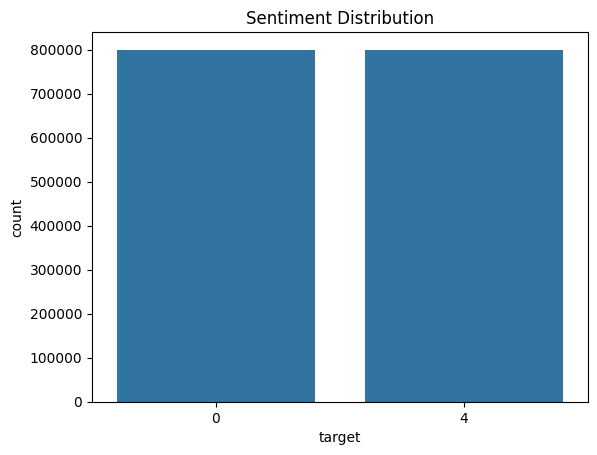

target
0    800000
4    800000
Name: count, dtype: int64


In [7]:
# 4) Sentiment Distribution

# Visualizing the distribution of sentiment labels
sns.countplot(x='target', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Analyzing the balance of sentiment classes
sentiment_counts = df['target'].value_counts()
print(sentiment_counts)

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


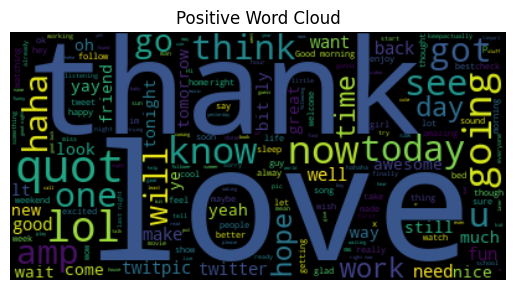

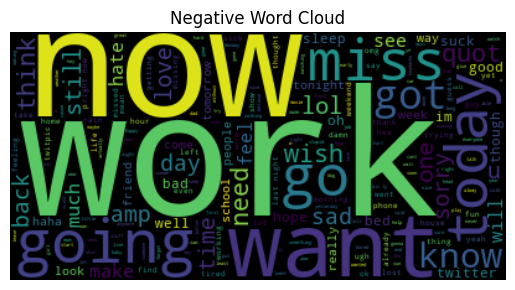

In [9]:
# 5) Word Frequency Analysis

from wordcloud import WordCloud

# Analyzing the word frequency in tweets
positive_tweets = df[df['target'] == 4]['text']
negative_tweets = df[df['target'] == 0]['text']

# Creating the word clouds for positive and negative sentiments
positive_wordcloud = WordCloud().generate(' '.join(positive_tweets))
negative_wordcloud = WordCloud().generate(' '.join(negative_tweets))

# Displaying the word clouds
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis('off')
plt.show()

plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis('off')
plt.show()

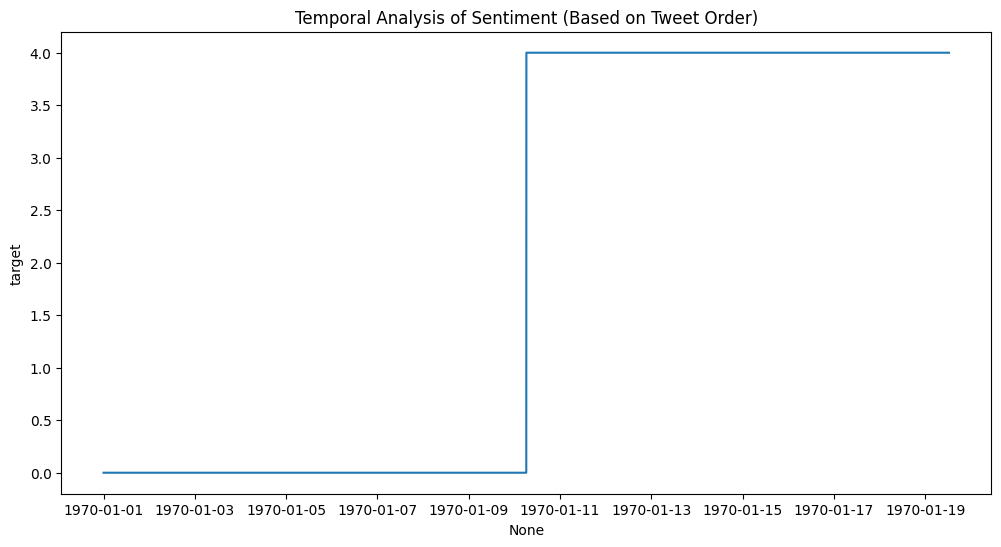

In [10]:
# 6) Temporal Analysis

# Assuming the index represents the order of tweets in the dataset
# Converting the index to datetime (assuming it's a numerical index)
df.index = pd.to_datetime(df.index, unit='s')  # 's' assumes the index is in seconds, adjust if needed

# Exploring how sentiment varies over the "pseudo-time" index
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='target', data=df)
plt.title('Temporal Analysis of Sentiment (Based on Tweet Order)')
plt.show()


In [11]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishakha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishakha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vishakha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
pip install pandas nltk scikit-learn matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [15]:
# 7) Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)
df2 = df.head(15000)
df2['processed_text'] = df2['text'].apply(preprocess_text)
df2
print("After Text Processing:- ")
df2['processed_text']

After Text Processing:- 


C:\Users\Vishakha\AppData\Local\Temp\ipykernel_8832\397820761.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['processed_text'] = df2['text'].apply(preprocess_text)


1970-01-01 00:00:00    switchfoot awww thats bummer shoulda got david...
1970-01-01 00:00:01    upset cant update facebook texting might cry r...
1970-01-01 00:00:02    kenichan dived many time ball managed save res...
1970-01-01 00:00:03                      whole body feel itchy like fire
1970-01-01 00:00:04             nationwideclass behaving im mad cant see
                                             ...                        
1970-01-01 04:09:55                 aubreyoday hey aubrey ya ya dk split
1970-01-01 04:09:56    twaiting wife come stair knock tivo leaf tomor...
1970-01-01 04:09:57                            yer hgistory presetnation
1970-01-01 04:09:58                            really miss talking missy
1970-01-01 04:09:59    dinner ok mussel appetizer followed chicken st...
Name: processed_text, Length: 15000, dtype: object

In [16]:
# 8) Sentiment Prediction Model

X_train, X_test, y_train, y_test = train_test_split(df2['processed_text'], df2['target'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 1.00
F1 Score: 1.00


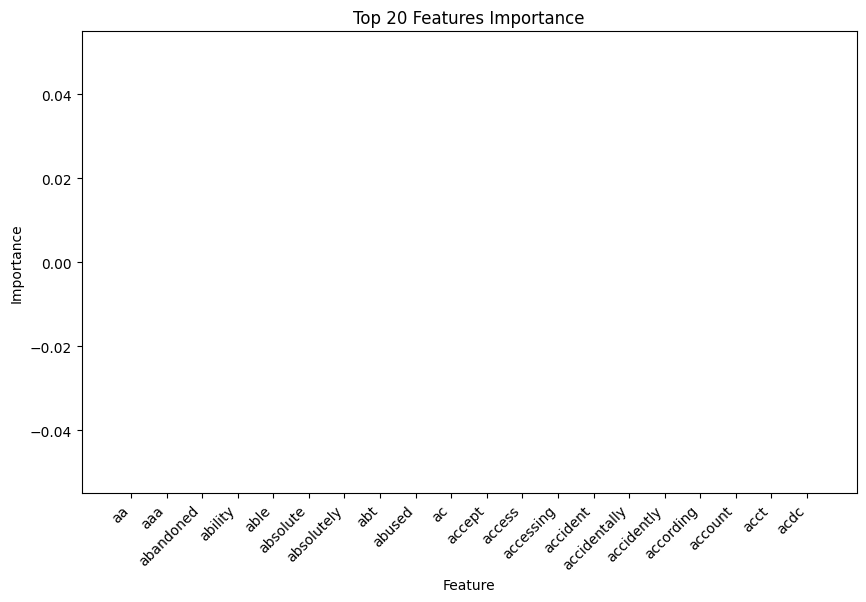

In [17]:
# 9) Feature Importance
feature_names = vectorizer.get_feature_names_out()
feature_importance = model.feature_importances_

# Creating a DataFrame to store feature names and their importance scores
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
top_features = feature_df.nlargest(20, 'Importance')

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Features Importance')
plt.show()

In [18]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install ipywidgets


In [20]:
# 10. User Interface:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from ipywidgets import widgets, interact
from IPython.display import display

# Load the dataset
df = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, encoding='ISO-8859-1')
df.columns = ['target', 'id', 'date', 'query', 'user', 'text']

# Remove unnecessary columns
df = df[['target', 'text']]

# Map target values to sentiment labels
df['sentiment'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

# Clean the text data (remove URLs, special characters, etc.)
def clean_text(text):
    # Your text cleaning code here
    # For simplicity, let's assume we only want to convert text to lowercase
    cleaned_text = text.lower()
    return cleaned_text

df['cleaned_text'] = df['text'].apply(clean_text)

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_vectorized, y)

# Function to predict sentiment for input text
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return prediction[0]

# User Interface
def analyze_sentiment(input_text):
    result = predict_sentiment(input_text)
    print(f"Sentiment Prediction: {result}")

# Create interactive widget
text_input = widgets.Text(description="Enter text:", value="Lyx is cool")
interact(analyze_sentiment, input_text=text_input)


interactive(children=(Text(value='Lyx is cool', description='Enter text:'), Output()), _dom_classes=('widget-i…

<function __main__.analyze_sentiment(input_text)>